# **Sobreajuste y Subajuste en modelos de IA**

## **1. Que es el sobreajuste y subajuste en un modelo de Machine Learning?**

Es muy común que al entrenar modelos de IA y obtener una métrica de evaluacion del mismo, se piense que ha conseguido el mejor resultado. Luego, a la hora de predecir datos nuevos, el modelo se comporta mucho peor que en el entrenamiento. Esto es un problema muy importante al productivizar modelos, ya que modelos que en desarrollo parecían buenos, al sacarlos a produccion son un total desastre. Esto se debe muchas veces al hecho de que esos modelos están sobreajustados o subajutado a los datos de entrenamiento.

Hay que recordar que el objetivo de los modelos de IA es el de obtener patrones de los datos de entrenamiento disponibles de cara a predecir o inferir correctamente datos nuevos. Es decir, el concepto clave es el de entrenar y obtener patrones generales que sean extrapolables a nuevos datos.

* **Definición de sobreajuste:** se da cuando el modelo aprende demasiado de los datos de entrenamiento, capturando ruido y patrones específicos de ese conjunto, lo que afecta su capacidad de generalización. El modelo es tan ajustado a los datos de entrenamiento que no generaliza bien a los datos de prueba.

* **Definición de subajuste:** es cuando el modelo es demasiado simple para captar los patrones subyacentes en los datos. El modelo es tan simple que no se ajusta correctamente a los patrones que hay en los datos de entrenamiento.

## **2. Representacion grafica de sobreajuste y subajuste**

Vamos a visualizar un conjunto de datos sinteticos distribuidos en circulos concentrico. En este caso tenemos dos clases: Clase 0 (roja) y clase 1 (azul). Vamos a intentar simular un problema de clasificacion binaria no lineal.

/tmp/ipykernel_19726/4134752249.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


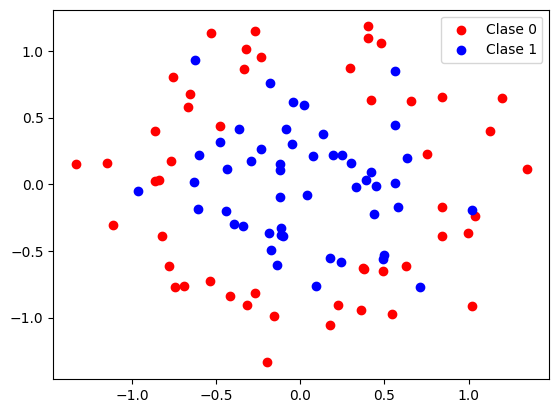

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from matplotlib.patches import Circle

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Generar el dataset make_circles
X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=42)

# Graficar los puntos de make_circles con colores rojo y azul para cada clase
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')

# agregamos la leyenda
ax.legend()

fig.show()

### *Representacion del Subjauste: Modelo de IA muy simple que no separa de la mejor manera*

Trazamos una linea recta en $y=0$ la cual representa las predicciones del modelo de IA.

/tmp/ipykernel_19726/1348604006.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


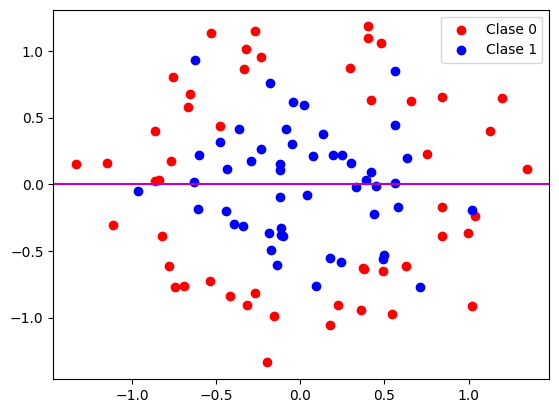

In [4]:
from sklearn.datasets import make_circles
from matplotlib.patches import Circle

# Crear la figura y los ejes
fig, ax = plt.subplots()

ax.axhline(y=0, xmax=0, xmin=1, color="m")

# Generar el dataset make_circles
X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=42)

# Graficar los puntos de make_circles con colores rojo y azul para cada clase
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')

# agregamos la leyenda
ax.legend()

fig.show()

> Como vemos, el modelo es tan simple (una linea recta) que no logra separar las clases.

### *Representacion del Sobreajuste: Modelo de IA tan complejo que clasifica el 100% de las muestras durante la fase de entrenamiento*

> En este caso, el modelo se ajusta tan bien a los datos de entrenamiento que logra separar las dos clase en un 100%. Esto podria presentar problemas a la hora de evaluar el modelo con muestras nuevas ya que puede clasificar de manera erronea algunas clases.

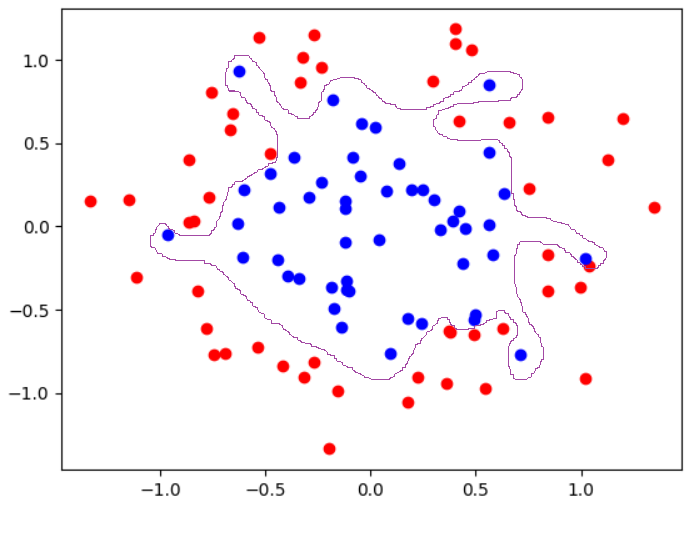

### *Representacion de un Modelo de IA ajustado*

/tmp/ipykernel_19726/3808937817.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


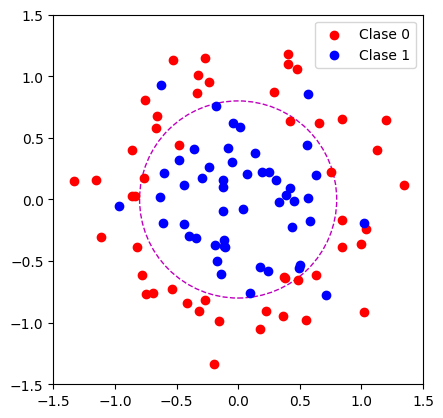

In [5]:
from sklearn.datasets import make_circles
from matplotlib.patches import Circle

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Definir la circunferencia con centro en (0,0) y radio 0.5
circle = Circle((0, 0), .8, color='m', fill=False  , ls='--')
# Añadir la circunferencia a los ejes
ax.add_patch(circle)
# Ajustar los límites de los ejes para que la circunferencia esté bien centrada
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
# Configurar los ejes con la misma escala
ax.set_aspect('equal')

# Generar el dataset make_circles
X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=42)

# Graficar los puntos de make_circles con colores rojo y azul para cada clase
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')

# agregamos la leyenda
ax.legend()

fig.show()

> En este caso, el modelo logra separar gran parte de la clase 1 de la clase 0. Este seria un comportamiento esperado de un modelo de IA debido a que presenta un margen de error minimo en cuanto a algunas predicciones logrando capturar la mayor parte de la muetras de clase 1.

## **3. ¿Cómo Identificar el sobreajuste?**

Existen dos metodos para evaluar el ajuste del modelo:

* **Gráficas de error (train vs test):** Compara el error de los datos de entrenamiento con los prueba para detectar sobreajuste. Si ambas curvas estan muy cercanas entre si, se presume que el modelo esta ajustado correctamente a los datos y generaliza muy bien. Si las curvas en un punto se separan, se dice que el modelo esta sobreajustado despues de cierto nivel de complejidad del modelo. La complejidad del modelo puede venir representada por la cantidad de capas ocultas, cantidad de neuronas, numero de epocas, entre otros.

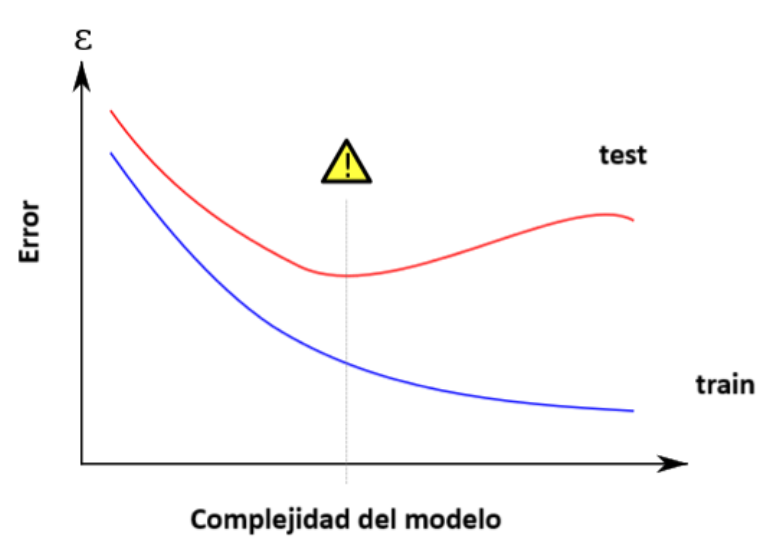


* **Métricas de desempeño:** El uso de métricas como la pérdida ($loss$) y la precisión ($accuracy$) en los datos de entrenamiento y validación permiten identificar si un modelo está sobreajustado o subajustado.

# **Ejemplo practico de sobreajuste**

2025-01-28 15:18:59.663006: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-28 15:18:59.861510: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-28 15:19:00.072340: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738095540.227448   19726 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738095540.267410   19726 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-28 15:19:00.692422: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/20


2025-01-28 15:19:07.754836: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.7862 - loss: 0.6659 - val_accuracy: 0.9581 - val_loss: 0.1345
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9454 - loss: 0.1822 - val_accuracy: 0.9670 - val_loss: 0.1059
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9573 - loss: 0.1377 - val_accuracy: 0.9737 - val_loss: 0.0887
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9658 - loss: 0.1079 - val_accuracy: 0.9761 - val_loss: 0.0813
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9693 - loss: 0.1008 - val_accuracy: 0.9768 - val_loss: 0.0779
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9730 - loss: 0.0880 - val_accuracy: 0.9779 - val_loss: 0.0763
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9745 - loss: 0.0799 - val_accuracy: 0.9776 - val_loss: 0.0778
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9755 - loss: 0.0771 - val_accuracy:

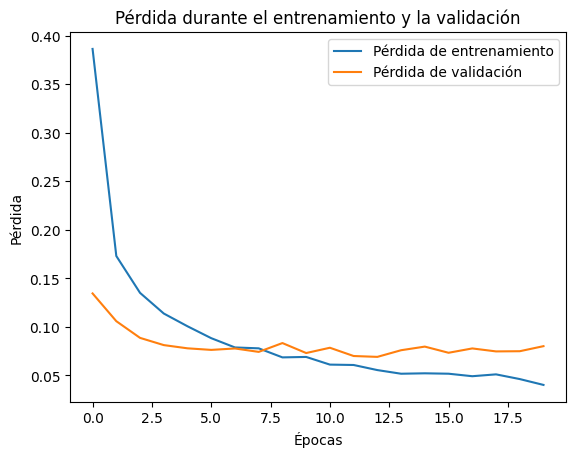

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Crear el modelo con Dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.5))  # Regularización con Dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Regularización con Dropout
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo y almacenar el historial
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Evaluar el modelo
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Graficar las pérdidas de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
